## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D

## Data Loading

In [2]:
# Load the data
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# Concatenate the training and test data as features and labels
features = np.concatenate((X_train, X_test), axis=0)
labels = np.concatenate((y_train, y_test), axis=0)

# Create a dataframe with the features and the labels
dataset = tf.data.Dataset.from_tensor_slices((features, labels))

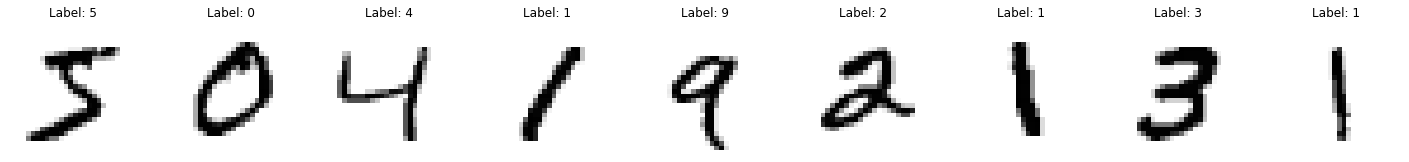

In [3]:
plt.figure(figsize=(25, 6))
for i in range(9):
    plt.subplot(1, 9, i+1)
    plt.imshow(X_train[i], cmap='binary')
    plt.title(f'Label: {y_train[i]}')
    plt.axis('off')
plt.show()

## Data Preprocessing

### Split Data

In [4]:
# Split the data into training, validation and test sets
train_dataset = dataset.take(int(len(dataset) * 0.8)).shuffle(len(dataset)).batch(23)
validation_dataset = dataset.skip(int(len(dataset) * 0.8)).take(int(len(dataset) * 0.1)).batch(23)
test_dataset = dataset.skip(int(len(dataset) * 0.9)).batch(23)